# Business case: Delhivery

Problem statement:

    Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

    The objective is to clean, sanitize, and process the data to get meaningful features. Raw data needs to be tranformed so that the data team can build forecasting models on it.

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [74]:
df=pd.read_csv('delhivery.csv')

In [75]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [76]:
df.shape

(144867, 24)

We have 144867 data points and 24 columns in the raw data.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [78]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

Since the number of null values are very less we will drop the rows containing null values.

In [79]:
df[df['destination_center'].isin((df[df['source_name'].isna()]['source_center']))]['destination_name'].isna().sum()

240

Removing null values

In [80]:
df=df.dropna()

In [81]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [82]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,233.561345,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
std,1038.082976,345.245823,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,161.000000,22.000000,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,451.000000,66.000000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,1645.000000,286.000000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


We can see that mean and median for almost all variables are very different from each other and hence we may assume that there are outlier associated with them and hence we will have to do outluer treatment as well.

In [83]:
df.describe(include='all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,...,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
unique,2,14787,1497,2,14787,1496,1496,1466,1466,26223,...,92894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-10-01 05:04:55.268931,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104632,101,1812,99132,101,23267,23267,15192,15192,81,...,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000


In [84]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [85]:
df.loc[:,'od_start_time']=df['od_start_time'].astype('datetime64')
df.loc[:,'od_end_time']=df['od_end_time'].astype('datetime64')

C:\Users\varun\AppData\Local\Temp\ipykernel_22492\2486385623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'od_start_time']=df['od_start_time'].astype('datetime64')
C:\Users\varun\AppData\Local\Temp\ipykernel_22492\2486385623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'od_end_time']=df['od_end_time'].astype('datetime64')


Required columns has been converted into datetime format.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  object        
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [101]:
df['od_start_to_end'] = df['od_end_time']-df['od_start_time']

C:\Users\varun\AppData\Local\Temp\ipykernel_22492\241515641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['od_start_to_end'] = df['od_end_time']-df['od_start_time']


In [118]:
df['od_start_to_end_minutes'] = (df['od_start_to_end'].dt.total_seconds()/60).round()

C:\Users\varun\AppData\Local\Temp\ipykernel_22492\3188247670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['od_start_to_end_minutes'] = (df['od_start_to_end'].dt.total_seconds()/60).round()


In [119]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,od_start_to_end,od_start_to_end_minutes
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,0 days 01:26:12.818197,86.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,0 days 01:26:12.818197,86.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,0 days 01:26:12.818197,86.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,0 days 01:26:12.818197,86.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,0 days 01:26:12.818197,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,0 days 07:07:41.181838,428.0
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,0 days 07:07:41.181838,428.0
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,0 days 07:07:41.181838,428.0
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630,0 days 07:07:41.181838,428.0


In [120]:
from scipy.stats import ttest_ind

In [121]:
ttest_ind(df['od_start_to_end_minutes'], df['start_scan_to_end_scan'])

Ttest_indResult(statistic=0.12883149705087785, pvalue=0.8974910719276081)

In [123]:
np.mean(df['od_start_to_end_minutes']-df['start_scan_to_end_scan'])

0.49786579450649965

Since the newly created columns for od start to end time in minutes are same as existing column we can drop the same.

In [125]:
df['trip_creation_time']=df['trip_creation_time'].astype('datetime64')

C:\Users\varun\AppData\Local\Temp\ipykernel_22492\1109772616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_creation_time']=df['trip_creation_time'].astype('datetime64')


In [127]:
#Creation of features like trip creation year, month, and day

df['trip_creation_year'] = df['trip_creation_time'].dt.year
df['trip_creation_month'] = df['trip_creation_time'].dt.month
df['trip_creation_day'] = df['trip_creation_time'].dt.day

C:\Users\varun\AppData\Local\Temp\ipykernel_22492\2800197737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_creation_year'] = df['trip_creation_time'].dt.year
C:\Users\varun\AppData\Local\Temp\ipykernel_22492\2800197737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_creation_month'] = df['trip_creation_time'].dt.month
C:\Users\varun\AppData\Local\Temp\ipykernel_22492\2800197737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [129]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,od_start_to_end,od_start_to_end_minutes,trip_creation_year,trip_creation_month,trip_creation_day
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.272727,14.0,11.0,11.9653,1.272727,0 days 01:26:12.818197,86.0,2018,9,20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.200000,10.0,9.0,9.7590,1.111111,0 days 01:26:12.818197,86.0,2018,9,20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.428571,16.0,7.0,10.8152,2.285714,0 days 01:26:12.818197,86.0,2018,9,20
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.550000,21.0,12.0,13.0224,1.750000,0 days 01:26:12.818197,86.0,2018,9,20
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.545455,6.0,5.0,3.9153,1.200000,0 days 01:26:12.818197,86.0,2018,9,20


In [138]:
df[['destination_name','source_name']] = df[['destination_name','source_name']].astype(dtype = 'string')

C:\Users\varun\AppData\Local\Temp\ipykernel_22492\2335389038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['destination_name','source_name']] = df[['destination_name','source_name']].astype(dtype = 'string')


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   data                            144316 non-null  object         
 1   trip_creation_time              144316 non-null  datetime64[ns] 
 2   route_schedule_uuid             144316 non-null  object         
 3   route_type                      144316 non-null  object         
 4   trip_uuid                       144316 non-null  object         
 5   source_center                   144316 non-null  object         
 6   source_name                     144316 non-null  string         
 7   destination_center              144316 non-null  object         
 8   destination_name                144316 non-null  string         
 9   od_start_time                   144316 non-null  datetime64[ns] 
 10  od_end_time                     144316 non-n

In [170]:
#Extracting city, place, and state out of destination name column

def fun(x):
    try:
        return x[1]
    except:
        return None


df['destination_city'] = df['destination_name'].str.split('_').apply(lambda x: x[0])
df['destination_place'] = df['destination_name'].str.split('_').apply(fun)
df['destination_state'] = df['destination_name'].str.split('(').apply(lambda x: x[1][:-1])

C:\Users\varun\AppData\Local\Temp\ipykernel_22492\1095939612.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['destination_city'] = df['destination_name'].str.split('_').apply(lambda x: x[0])
C:\Users\varun\AppData\Local\Temp\ipykernel_22492\1095939612.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['destination_place'] = df['destination_name'].str.split('_').apply(fun)
C:\Users\varun\AppData\Local\Temp\ipykernel_22492\1095939612.py:12: SettingWithCopyWarning: 
A value is trying to be set on 

In [174]:
#Extracting city, place, and state out of source name column

df['source_city'] = df['source_name'].str.split('_').apply(lambda x: x[0])
df['source_place'] = df['source_name'].str.split('_').apply(fun)
df['source_state'] = df['source_name'].str.split('(').apply(lambda x: x[1][:-1])

C:\Users\varun\AppData\Local\Temp\ipykernel_22492\3367339759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source_city'] = df['source_name'].str.split('_').apply(lambda x: x[0])
C:\Users\varun\AppData\Local\Temp\ipykernel_22492\3367339759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source_place'] = df['source_name'].str.split('_').apply(fun)
C:\Users\varun\AppData\Local\Temp\ipykernel_22492\3367339759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [176]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,od_start_to_end_minutes,trip_creation_year,trip_creation_month,trip_creation_day,destination_city,destination_place,destination_state,source_city,source_place,source_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,2018,9,20,Khambhat,MotvdDPP,Gujarat,Anand,VUNagar,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,2018,9,20,Khambhat,MotvdDPP,Gujarat,Anand,VUNagar,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,2018,9,20,Khambhat,MotvdDPP,Gujarat,Anand,VUNagar,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,2018,9,20,Khambhat,MotvdDPP,Gujarat,Anand,VUNagar,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,2018,9,20,Khambhat,MotvdDPP,Gujarat,Anand,VUNagar,Gujarat


In [396]:
dft = df.groupby('trip_uuid')[['source_state', 'destination_state','source_city','destination_city']].min().reset_index()
dft

,trip_uuid,source_state,destination_state,source_city,destination_city
0,trip-153671041653548748,Madhya Pradesh,Haryana,Bhopal,Gurgaon
1,trip-153671042288605164,Karnataka,Karnataka,Doddablpur,Chikblapur
2,trip-153671043369099517,Haryana,Haryana,Bangalore,Chandigarh
3,trip-153671046011330457,Maharashtra,Maharashtra,Mumbai Hub (Maharashtra),Mumbai
4,trip-153671052974046625,Karnataka,Karnataka,Bellary,Bellary
...,...,...,...,...,...
14782,trip-153861095625827784,Chandigarh,Punjab,Chandigarh,Chandigarh
14783,trip-153861104386292051,Haryana,Haryana,FBD,Faridabad
14784,trip-153861106442901555,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur
14785,trip-153861115439069069,Tamil Nadu,Tamil Nadu,Eral,Eral


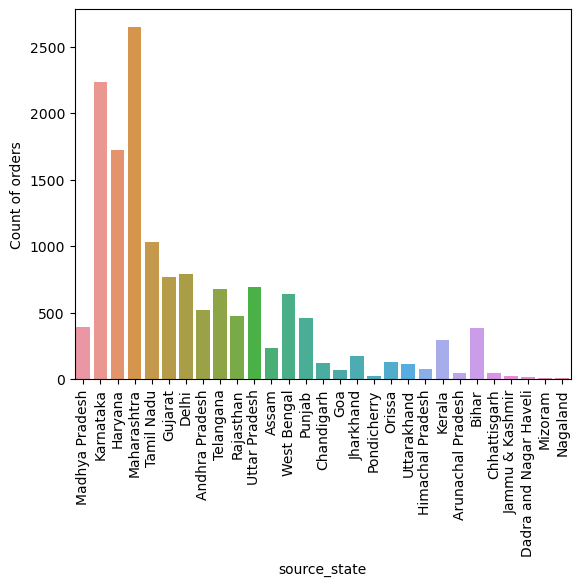

In [400]:
sns.countplot(data=dft, x='source_state')
plt.ylabel('Count of orders')
plt.xticks(rotation=90)
plt.show()

Insight: As we can see highest orders are from Maharashtra.

Recommendation: More vehicles maybe kept ready for the state of Maharashtra and Karnataka inorder to cater high demand which is possibly because of highest number of industries present in these state.

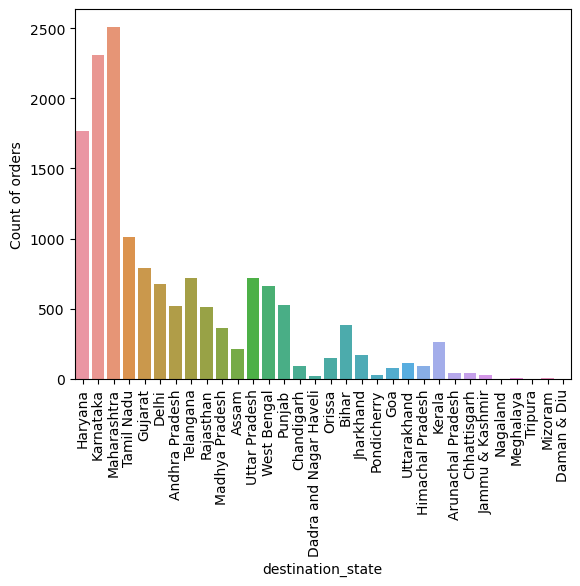

In [401]:
sns.countplot(data=dft, x='destination_state')
plt.ylabel('Count of orders')
plt.xticks(rotation=90)
plt.show()

Insight: Again highest number of orders are pointing to the states of Maharashtra and Karnataka as the destination states.

Recommendation: Its clear that more number of vehicles must be kept as reserve for the states of Maharashtra and Karnataka to cater high demand.

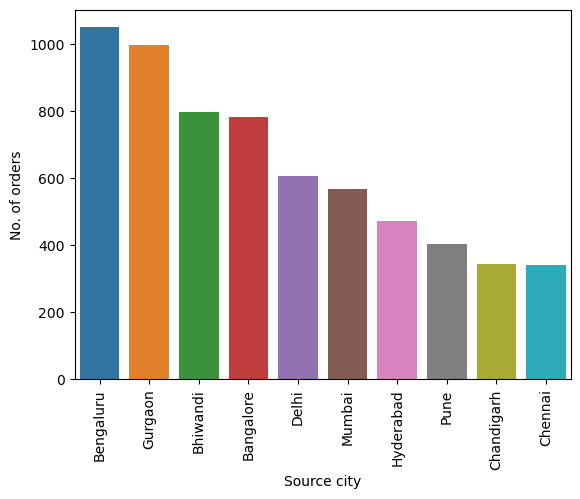

In [408]:
sns.barplot(data = dft['source_city'].value_counts().head(10).reset_index(), y='source_city', x='index')
plt.xlabel('Source city')
plt.xticks(rotation=90)
plt.ylabel('No. of orders')
plt.show()

Insight: AS we can see highest number of orders are from Bengaluru(Same city has been written in 2 names Bengaluru and Bangalore) and then Gurgaon.
Recommendation: Bengaluru and Gurgaon are highly developed cities with high number of industries and much higher population compared to other places. So highes number of vehciles must be kep available for these cities from which highest number of orders are coming.

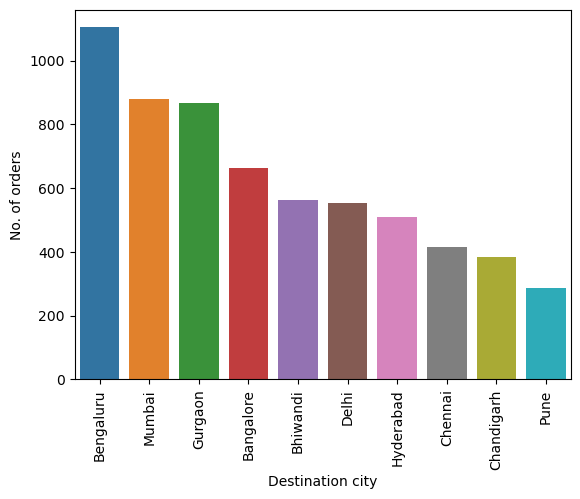

In [409]:
sns.barplot(data = dft['destination_city'].value_counts().head(10).reset_index(), y='destination_city', x='index')
plt.xlabel('Destination city')
plt.xticks(rotation=90)
plt.ylabel('No. of orders')
plt.show()

Insight: Here also Bengaluru is coming first then Mumbai and then Gurgaon when we compare destination cities with number of orders.

Recommendation: As mentioned previously, vehicles are to be kept reserved for these cities.

States with most interstate movements

In [419]:
dft2 = dft[dft['source_state']==dft['destination_state']].groupby(['source_state', 'destination_state'])['trip_uuid'].count().reset_index()
dft2 = dft2.sort_values(by='trip_uuid', ascending=False).head(10)
dft2

,source_state,destination_state,trip_uuid
16,Maharashtra,Maharashtra,2426
13,Karnataka,Karnataka,2122
22,Tamil Nadu,Tamil Nadu,996
9,Haryana,Haryana,932
8,Gujarat,Gujarat,692
23,Telangana,Telangana,634
26,West Bengal,West Bengal,610
24,Uttar Pradesh,Uttar Pradesh,534
0,Andhra Pradesh,Andhra Pradesh,488
21,Rajasthan,Rajasthan,409


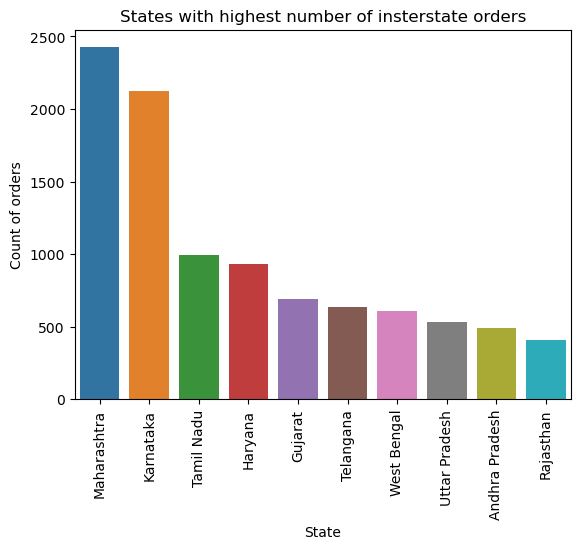

In [422]:
sns.barplot(data=dft2, x='source_state', y='trip_uuid')
plt.ylabel('Count of orders')
plt.title('States with highest number of insterstate orders')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()

Insight: Above barplot shows the states with highest number of insterstate orders(within the state). Highest is in Maharashtra and then comes Karnataka.

Recommendation: To cater the demand for interstate orders enough amount of state permit vehicles maybe kept available and not national permit because can avoid the burder of paying the extra amount for national permit.

Routes with most intrastate movements

In [428]:
dft2 = dft[dft['source_state']!=dft['destination_state']].groupby(['source_state', 'destination_state'])['trip_uuid'].count().reset_index()
dft2 = dft2.sort_values(by='trip_uuid', ascending=False).head(10)
dft2['source-destination']=dft2['source_state']+'-'+dft2['destination_state']
dft2

,source_state,destination_state,trip_uuid,source-destination
17,Delhi,Haryana,444,Delhi-Haryana
32,Haryana,Delhi,311,Haryana-Delhi
20,Delhi,Uttar Pradesh,92,Delhi-Uttar Pradesh
44,Haryana,Uttar Pradesh,91,Haryana-Uttar Pradesh
107,Uttar Pradesh,Delhi,77,Uttar Pradesh-Delhi
40,Haryana,Punjab,72,Haryana-Punjab
41,Haryana,Rajasthan,70,Haryana-Rajasthan
108,Uttar Pradesh,Haryana,68,Uttar Pradesh-Haryana
64,Madhya Pradesh,Haryana,63,Madhya Pradesh-Haryana
13,Chandigarh,Punjab,60,Chandigarh-Punjab


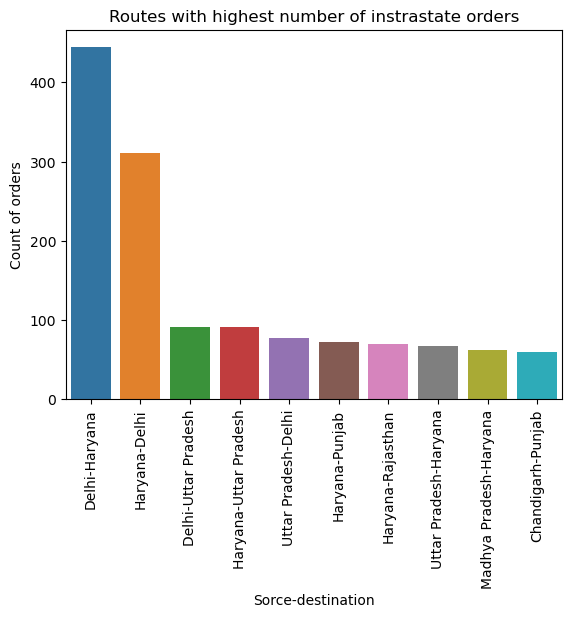

In [429]:
sns.barplot(data=dft2, x='source-destination', y='trip_uuid')
plt.ylabel('Count of orders')
plt.title('Routes with highest number of instrastate orders')
plt.xlabel('Sorce-destination')
plt.xticks(rotation=90)
plt.show()

Insights: Highest number of instra-state movements are between Delhi_Haryana and Haryana-Delhi.

Recommendation: Highest number of national permit(NP) vehicles must be reserved for these routes.

In [184]:
#Merging the rows by aggregating cells based on trip_uuid, source_center, destination_center

df1 = df.groupby(['trip_uuid', 'source_center', 'destination_center'])['data', 'route_type', 'start_scan_to_end_scan', 'actual_distance_to_destination', 'osrm_distance', 'actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time','segment_osrm_distance'].aggregate({'data':'min', 'route_type':'min', 'start_scan_to_end_scan':'max', 'actual_distance_to_destination':'max','osrm_distance':'max', 'actual_time':'max', 'osrm_time':'max', 'segment_actual_time':'sum', 'segment_osrm_time':'sum', 'segment_osrm_distance':'sum'}).reset_index()

C:\Users\varun\AppData\Local\Temp\ipykernel_22492\3070363860.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.groupby(['trip_uuid', 'source_center', 'destination_center'])['data', 'route_type', 'start_scan_to_end_scan', 'actual_distance_to_destination', 'osrm_distance', 'actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time','segment_osrm_distance'].aggregate({'data':'min', 'route_type':'min', 'start_scan_to_end_scan':'max', 'actual_distance_to_destination':'max','osrm_distance':'max', 'actual_time':'max', 'osrm_time':'max', 'segment_actual_time':'sum', 'segment_osrm_time':'sum', 'segment_osrm_distance':'sum'}).reset_index()


In [186]:
df1.head()

,trip_uuid,source_center,destination_center,data,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,1260.0,383.759164,446.5496,732.0,349.0,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,999.0,440.973689,544.8027,830.0,394.0,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,58.0,24.644021,28.1994,47.0,26.0,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,122.0,48.542890,56.9116,96.0,42.0,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,834.0,242.309306,281.2109,611.0,212.0,608.0,231.0,317.7408


In [279]:
#Further aggregating based on trip_uuid only

df2 = df1.groupby('trip_uuid')['data','route_type', 'start_scan_to_end_scan', 'actual_distance_to_destination', 'osrm_distance', 'actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time','segment_osrm_distance'].aggregate({'data':'min','route_type':'min', 'start_scan_to_end_scan':'sum', 'actual_distance_to_destination':'sum','osrm_distance':'sum', 'actual_time':'sum', 'osrm_time':'sum', 'segment_actual_time':'sum', 'segment_osrm_time':'sum', 'segment_osrm_distance':'sum'}).reset_index()

C:\Users\varun\AppData\Local\Temp\ipykernel_22492\2129541436.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df1.groupby('trip_uuid')['data','route_type', 'start_scan_to_end_scan', 'actual_distance_to_destination', 'osrm_distance', 'actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time','segment_osrm_distance'].aggregate({'data':'min','route_type':'min', 'start_scan_to_end_scan':'sum', 'actual_distance_to_destination':'sum','osrm_distance':'sum', 'actual_time':'sum', 'osrm_time':'sum', 'segment_actual_time':'sum', 'segment_osrm_time':'sum', 'segment_osrm_distance':'sum'}).reset_index()


In [280]:
df2.head()

,trip_uuid,data,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,FTL,2259.0,824.732854,991.3523,1562.0,743.0,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,Carting,180.0,73.186911,85.1110,143.0,68.0,141.0,65.0,84.1894
2,trip-153671043369099517,training,FTL,3933.0,1932.273969,2372.0852,3347.0,1741.0,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,Carting,100.0,17.175274,19.6800,59.0,15.0,59.0,16.0,19.8766
4,trip-153671052974046625,training,FTL,717.0,127.448500,146.7918,341.0,117.0,340.0,115.0,146.7919


In [190]:
#df2 is the final dataset where all the required columns are aggregated logically

In [382]:
dft = df2.groupby('route_type')['trip_uuid'].count().reset_index()
dft

,route_type,trip_uuid
0,Carting,8906
1,FTL,5881


<AxesSubplot:xlabel='route_type', ylabel='trip_uuid'>

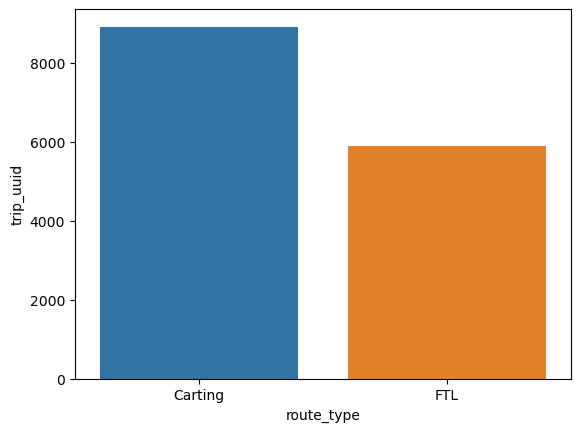

In [384]:
sns.barplot(data=dft, x='route_type', y='trip_uuid')

As we can see higher number pf orders are for Carting compared to FTL.

<AxesSubplot:xlabel='route_type', ylabel='actual_time'>

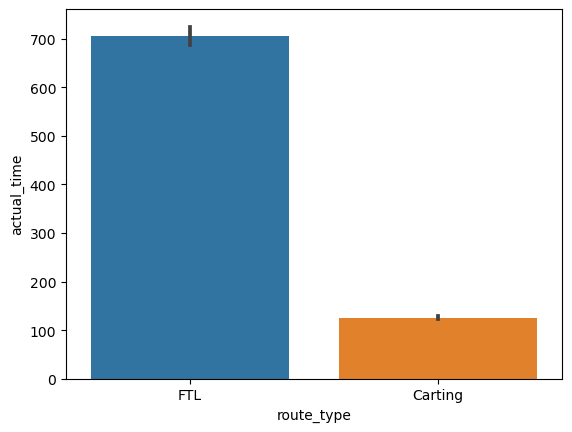

In [391]:
sns.barplot(data =df2, x='route_type', y='actual_time', estimator= np.mean)

The average time taken by FTL is is almost 7 times compared to Carting. This is because FTL is used when a truck with full load is to be transported to a relatively longer distance.

<AxesSubplot:xlabel='route_type', ylabel='actual_distance_to_destination'>

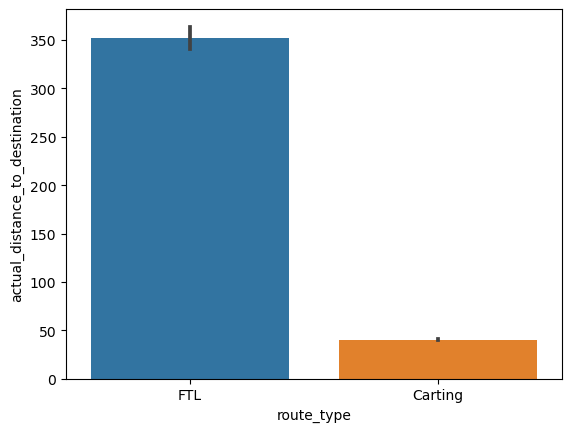

In [392]:
sns.barplot(data =df2, x='route_type', y='actual_distance_to_destination', estimator= np.mean)

As we can see for FTL the average distance to destination is very high compared to Carting. This maybe because FTL normally used when a truck with a full load is to be transported to a relatively longer distance whereas Carting is used where many stops might be required in between.

<AxesSubplot:ylabel='osrm_time'>

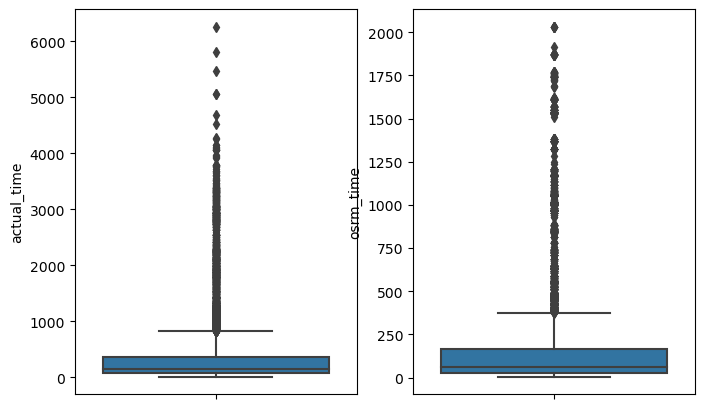

In [203]:
#actual_time_aggregated value and osrm_time_aggregated_value

plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.boxplot(data = df2, y='actual_time')

plt.subplot(1,2,2)
sns.boxplot(data = df2, y='osrm_time')

Aggregated values of actual time and osrm time are very different as per the above boxplot.
To confirm this we will conduct t-test on these two columns.

In [197]:
#Ho: mu1=mu2(aggregated values of actual time and osrm time are having same mean)
#Ha: mu1!=mu2(aggregated values of actual time and osrm time are different)

from scipy.stats import ttest_ind

alpha = 0.05

t_stat, p_value = ttest_ind(df2['actual_time'], df2['osrm_time'])

print('t_stat:',t_stat,'and p_value:',p_value)

if p_value<alpha:
    print('Reject null hypothesis, actual time and osrm time are different')
else:
    print('Failed to reject null hypothesis, hence actual time and osrm time are the same')

t_stat: 37.92331945613997 and p_value: 2.471871372960792e-307
Reject null hypothesis, actual time and osrm time are different


In [199]:
#Ho: mu1=mu2(aggregated values of actual time and osrm time are having same mean)
#Ha: mu1>mu2(aggregated values of actual time and osrm time are different)

from scipy.stats import ttest_ind

alpha = 0.05

t_stat, p_value = ttest_ind(df2['actual_time'], df2['osrm_time'], alternative = 'greater')

print('t_stat:',t_stat,'and p_value:',p_value)

if p_value<alpha:
    print('Reject null hypothesis, actual time is greater than osrm time')
else:
    print('Failed to reject null hypothesis, hence actual time and osrm time are the same')

t_stat: 37.92331945613997 and p_value: 1.235935686480396e-307
Reject null hypothesis, actual time is greater than osrm time


It's clear from the above hypothesis testing that actual_time is greater than osrm_time

<AxesSubplot:ylabel='segment_actual_time'>

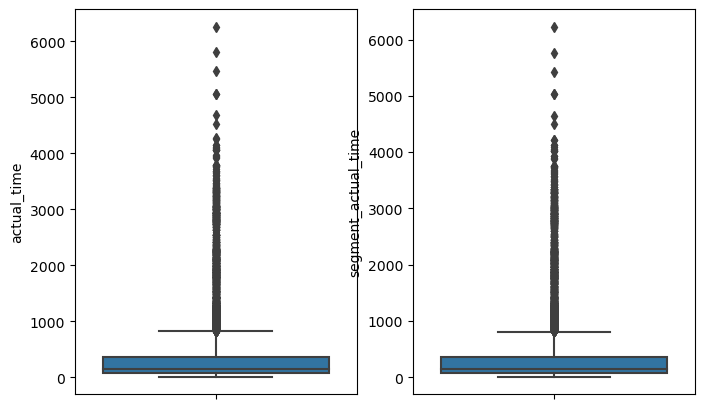

In [202]:
#actual_time_aggregated value and segment_actual_time_aggregated_value

plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.boxplot(data = df2, y='actual_time')

plt.subplot(1,2,2)
sns.boxplot(data = df2, y='segment_actual_time')

Above boxplots show distribution of aggregated values of actual time and segment actual time and they are looking almost identical. We will perform hypothesis testing to confirm this

<AxesSubplot:ylabel='segment_actual_time'>

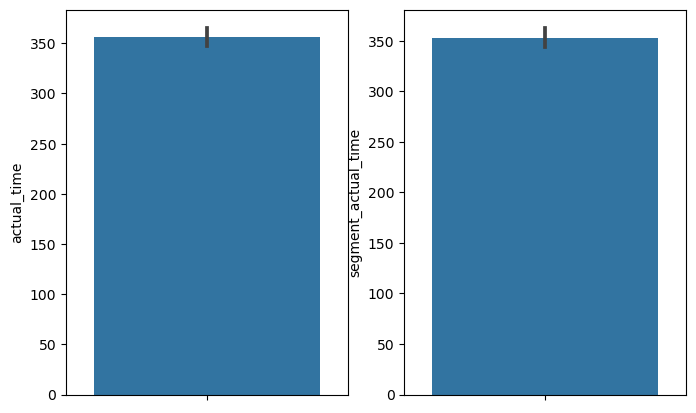

In [206]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.barplot(data = df2, y='actual_time', estimator = np.mean)

plt.subplot(1,2,2)
sns.barplot(data = df2, y='segment_actual_time', estimator = np.mean)

In [207]:
print('Mean value of actual time=', df2['actual_time'].mean())
print('Mean value of segment actual time=', df2['segment_actual_time'].mean())

Mean value of actual time= 356.30601203760057
Mean value of segment actual time= 353.0591735984311


In [209]:
#Ho: mu1=mu2(aggregated values of actual time and segment actual time are having same mean)
#Ha: mu1!=mu2(aggregated values of actual time and segment actual time are different)

from scipy.stats import ttest_ind

alpha = 0.05

t_stat, p_value = ttest_ind(df2['actual_time'], df2['segment_actual_time'])

print('t_stat:',t_stat,'and p_value:',p_value)

if p_value<alpha:
    print('Reject null hypothesis, actual time and segment actual time are different')
else:
    print('Failed to reject null hypothesis, hence actual time and segment actual time are the same')

t_stat: 0.499475764573994 and p_value: 0.6174479719707524
Failed to reject null hypothesis, hence actual time and segment actual time are the same


t_test has indicated that aggregated values of actual_time and segment_actual_time are the same

<AxesSubplot:ylabel='segment_osrm_distance'>

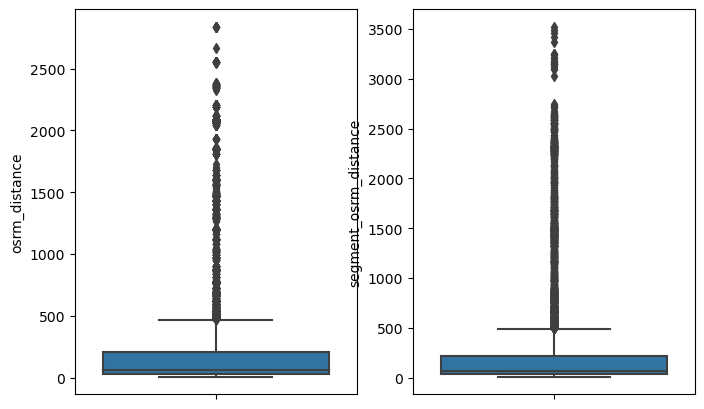

In [210]:
#osrm_distance aggregated value and segment_osrm_distance aggregated_value

plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.boxplot(data = df2, y='osrm_distance')

plt.subplot(1,2,2)
sns.boxplot(data = df2, y='segment_osrm_distance')

Above boxplots suggest that osrm_distance and segment_osrm_distance are similarly distributed. But we will perform hypothesis testing to confirm this.

In [213]:
print('Mean value of osrm distance=', df2['osrm_distance'].mean())
print('Mean value of segment segment osrm distance=', df2['segment_osrm_distance'].mean())

Mean value of osrm distance= 204.63757452492086
Mean value of segment segment osrm distance= 222.7054664434979


In [215]:
#Ho: mu1=mu2(aggregated values of osrm distance and segment osrm distance are having same mean)
#Ha: mu1!=mu2(aggregated values of osrm distance and segment osrm distance are different)

from scipy.stats import ttest_ind

alpha = 0.05

t_stat, p_value = ttest_ind(df2['osrm_distance'], df2['segment_osrm_distance'])

print('t_stat:',t_stat,'and p_value:',p_value)

if p_value<alpha:
    print('Reject null hypothesis, osrm_distance and segment_osrm_distance are different')
else:
    print('Failed to reject null hypothesis, hence osrm_distance and segment_osrm_distance are the same')

t_stat: -3.937420853623222 and p_value: 8.255072509709287e-05
Reject null hypothesis, osrm_distance and segment_osrm_distance are different


In [216]:
alpha = 0.05

t_stat, p_value = ttest_ind(df2['osrm_distance'], df2['segment_osrm_distance'], alternative = 'less')

print('t_stat:',t_stat,'and p_value:',p_value)

if p_value<alpha:
    print('Reject null hypothesis, osrm_distance is less than segment_osrm_distance')
else:
    print('Failed to reject null hypothesis, hence osrm_distance and segment_osrm_distance are the same')

t_stat: -3.937420853623222 and p_value: 4.1275362548546435e-05
Reject null hypothesis, osrm_distance is less than segment_osrm_distance


From the hypothesis testing it's clear that aggregated value of osrm_distance is less than segment_osrm_distance

<AxesSubplot:ylabel='segment_osrm_time'>

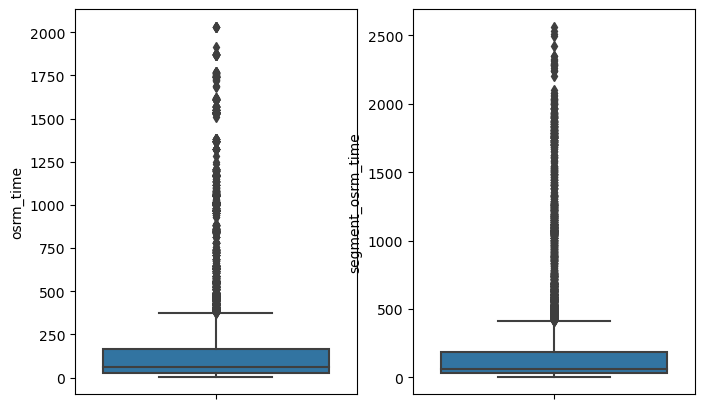

In [217]:
#osrm_time aggregated value and segment_osrm_time aggregated_value

plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.boxplot(data = df2, y='osrm_time')

plt.subplot(1,2,2)
sns.boxplot(data = df2, y='segment_osrm_time')

Boxplots of osrm_time and segment_osrm_time are looking similar. We will do hypothesis testing to confirm if they are actually same or not.

In [218]:
print('Mean value of osrm time=', df2['osrm_time'].mean())
print('Mean value of segment segment osrm time=', df2['segment_osrm_time'].mean())

Mean value of osrm time= 161.669574626361
Mean value of segment segment osrm time= 180.5115980252925


In [219]:
#Ho: mu1=mu2(aggregated values of osrm time and segment osrm time are having same mean)
#Ha: mu1!=mu2(aggregated values of osrm time and segment osrm time are different)

from scipy.stats import ttest_ind

alpha = 0.05

t_stat, p_value = ttest_ind(df2['osrm_time'], df2['segment_osrm_time'])

print('t_stat:',t_stat,'and p_value:',p_value)

if p_value<alpha:
    print('Reject null hypothesis, osrm_time and segment_osrm_time are different')
else:
    print('Failed to reject null hypothesis, hence osrm_time and segment_osrm_time are the same')

t_stat: -5.505014892530727 and p_value: 3.7220036379152134e-08
Reject null hypothesis, osrm_time and segment_osrm_time are different


In [220]:
alpha = 0.05

t_stat, p_value = ttest_ind(df2['osrm_time'], df2['segment_osrm_time'], alternative = 'less')

print('t_stat:',t_stat,'and p_value:',p_value)

if p_value<alpha:
    print('Reject null hypothesis, osrm_time is less than segment_osrm_time')
else:
    print('Failed to reject null hypothesis, hence osrm_time and segment_osrm_time are the same')

t_stat: -5.505014892530727 and p_value: 1.8610018189576067e-08
Reject null hypothesis, osrm_time is less than segment_osrm_time


From t_test it's now clear that the difference between osrm_time and segment_osrm_time is statistically significant and osrm_time is actually less than segment_osrm_time.

In [281]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14787 non-null  object 
 1   data                            14787 non-null  object 
 2   route_type                      14787 non-null  object 
 3   start_scan_to_end_scan          14787 non-null  float64
 4   actual_distance_to_destination  14787 non-null  float64
 5   osrm_distance                   14787 non-null  float64
 6   actual_time                     14787 non-null  float64
 7   osrm_time                       14787 non-null  float64
 8   segment_actual_time             14787 non-null  float64
 9   segment_osrm_time               14787 non-null  float64
 10  segment_osrm_distance           14787 non-null  float64
dtypes: float64(8), object(3)
memory usage: 1.2+ MB


In [282]:
for i in df2.columns:
    print(i)

trip_uuid
data
route_type
start_scan_to_end_scan
actual_distance_to_destination
osrm_distance
actual_time
osrm_time
segment_actual_time
segment_osrm_time
segment_osrm_distance


In [283]:
columns=list(df2.columns)

In [284]:
columns.remove('trip_uuid')
columns.remove('route_type')
columns.remove('data')

In [285]:
columns

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'osrm_distance',
 'actual_time',
 'osrm_time',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

In [286]:
n=len(columns)

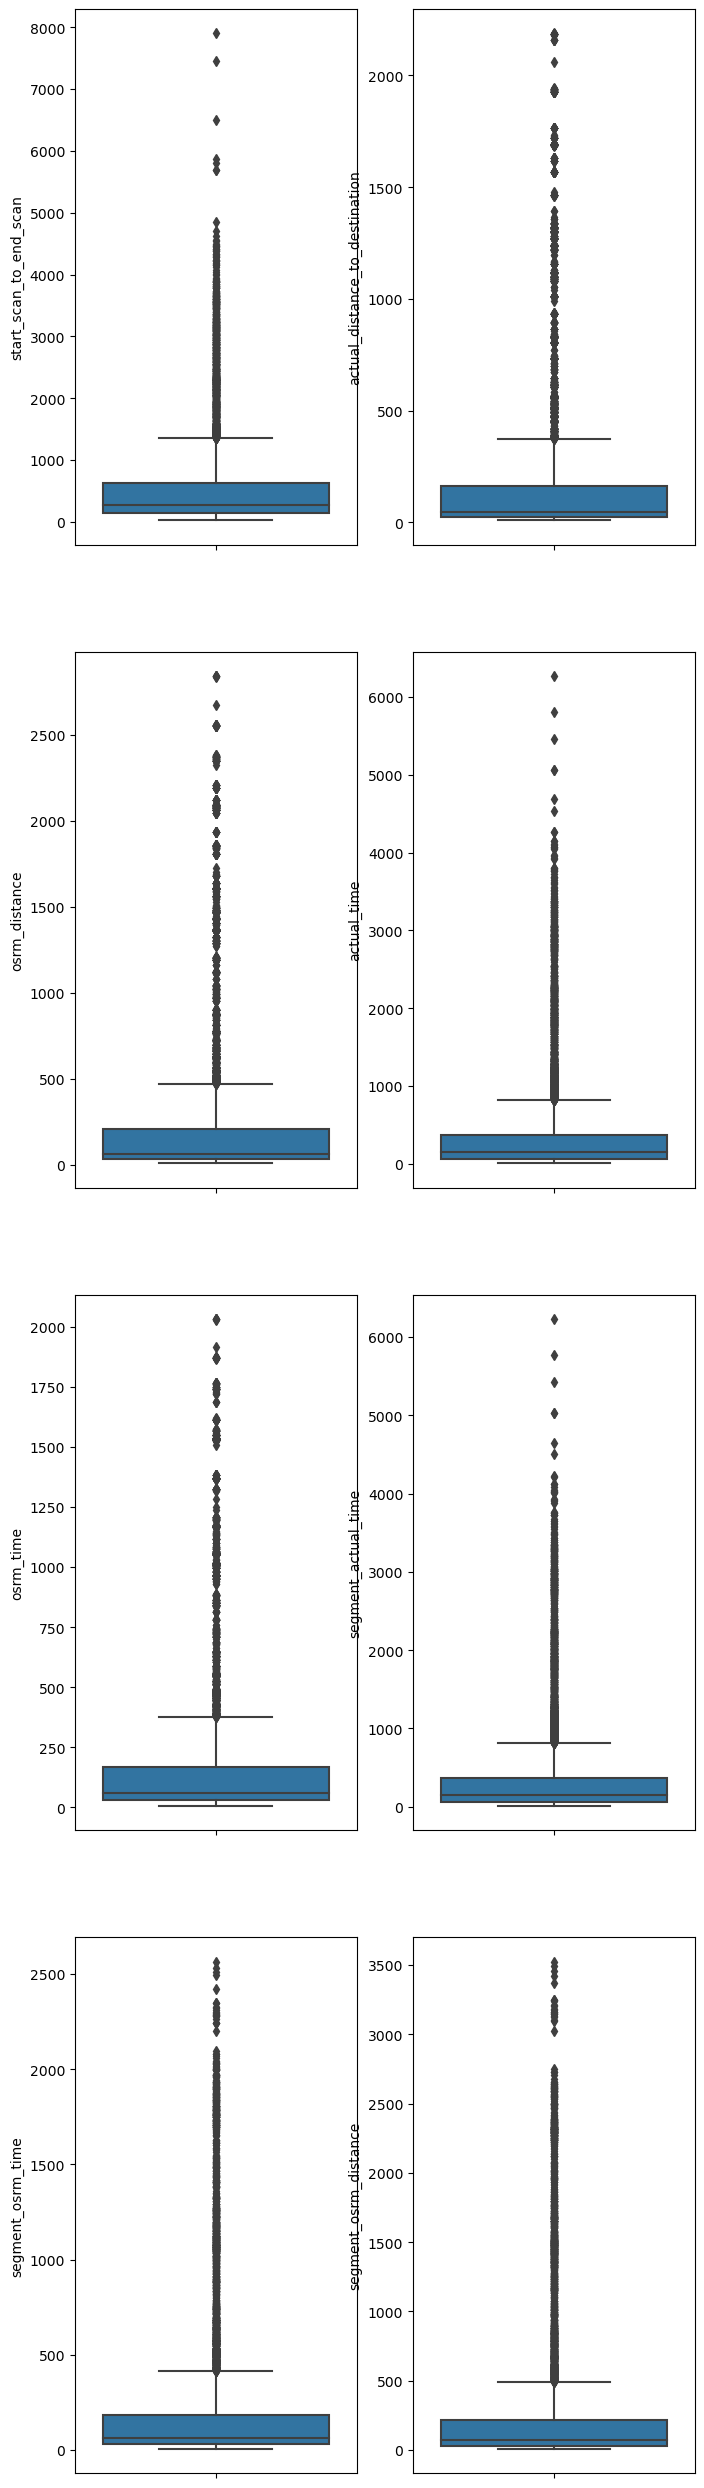

In [287]:
plt.figure(figsize=(8,32))
j=1
for i in columns:
    plt.subplot(4,2,j)
    sns.boxplot(data=df2, y=i) 
    j+=1

From above 8 boxplots we can see that there are outliers in all the numerical variables. So we will handle these outliers using IQR.

In [288]:
df3 = df2.copy()

In [289]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14787 non-null  object 
 1   data                            14787 non-null  object 
 2   route_type                      14787 non-null  object 
 3   start_scan_to_end_scan          14787 non-null  float64
 4   actual_distance_to_destination  14787 non-null  float64
 5   osrm_distance                   14787 non-null  float64
 6   actual_time                     14787 non-null  float64
 7   osrm_time                       14787 non-null  float64
 8   segment_actual_time             14787 non-null  float64
 9   segment_osrm_time               14787 non-null  float64
 10  segment_osrm_distance           14787 non-null  float64
dtypes: float64(8), object(3)
memory usage: 1.2+ MB


In [290]:
for i in columns:
    ll=df3[i].quantile(0.25)
    ul=df3[i].quantile(0.75)
    iqr=ul-ll
    ll-= (1.5*iqr)
    ul+= (1.5*iqr)
    print(df3.shape)
    df3=df3[(df3[i]>=ll) & (df3[i]<=ul)].copy()

(14787, 11)
(13505, 11)
(12688, 11)
(12229, 11)
(11709, 11)
(11357, 11)
(11118, 11)
(10552, 11)


In [291]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9948 entries, 1 to 14786
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       9948 non-null   object 
 1   data                            9948 non-null   object 
 2   route_type                      9948 non-null   object 
 3   start_scan_to_end_scan          9948 non-null   float64
 4   actual_distance_to_destination  9948 non-null   float64
 5   osrm_distance                   9948 non-null   float64
 6   actual_time                     9948 non-null   float64
 7   osrm_time                       9948 non-null   float64
 8   segment_actual_time             9948 non-null   float64
 9   segment_osrm_time               9948 non-null   float64
 10  segment_osrm_distance           9948 non-null   float64
dtypes: float64(8), object(3)
memory usage: 932.6+ KB


We are finally left with 9948 rows out of 14787 rows after removing outliers using IQR method

In [292]:
df3['route_type'].value_counts()

Carting    8124
FTL        1824
Name: route_type, dtype: int64

Relationship between numerical variables

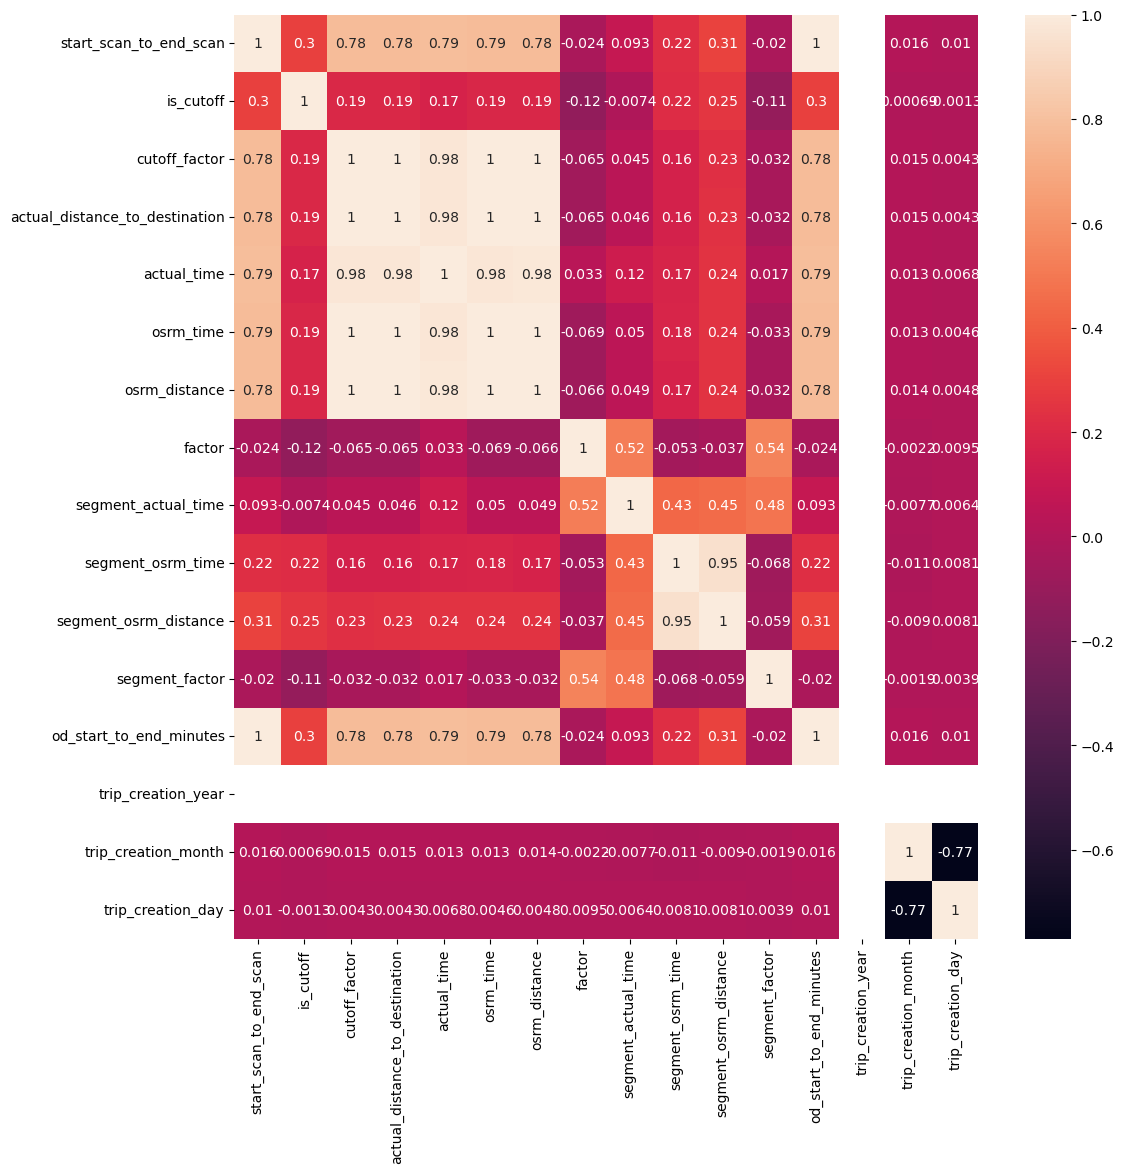

In [368]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Above heatmap high correlation between time and distance columns.

In [293]:
#One hot encoding of categorical variable(route_type)

from sklearn.preprocessing import LabelEncoder

col='route_type'

labelencoder=LabelEncoder()
df3[col]=labelencoder.fit_transform(df3[col])
df3[col].value_counts()

0    8124
1    1824
Name: route_type, dtype: int64

The column route_type has been encoded and now 0 represents Carting and 1 represents FTL

In [324]:
df4=df3.copy()

In [340]:
#Separating the train data before feature scaling

df_train=df4[df4['data']=='training']

df_test=df4[df4['data']=='test']

In [341]:
df_train.head()

,trip_uuid,data,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
1,trip-153671042288605164,training,0,180.0,73.186911,85.1110,143.0,68.0,141.0,65.0,84.1894
3,trip-153671046011330457,training,0,100.0,17.175274,19.6800,59.0,15.0,59.0,16.0,19.8766
4,trip-153671052974046625,training,1,717.0,127.448500,146.7918,341.0,117.0,340.0,115.0,146.7919
5,trip-153671055416136166,training,0,189.0,24.597048,28.0647,61.0,23.0,60.0,23.0,28.0647
6,trip-153671066201138152,training,0,98.0,9.100510,12.0184,24.0,13.0,24.0,13.0,12.0184


In [342]:
df_test.head()

,trip_uuid,data,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
10645,trip-153800653897073708,test,0,145.0,54.371063,57.5437,128.0,41.0,126.0,47.0,67.4925
10646,trip-153800654935210748,test,0,81.0,17.774611,21.7310,58.0,17.0,58.0,17.0,21.7310
10648,trip-153800659468028518,test,0,104.0,9.198088,11.5549,27.0,9.0,27.0,9.0,11.5549
10649,trip-153800661729668086,test,0,228.0,13.411425,18.1836,132.0,17.0,131.0,17.0,18.1836
10650,trip-153800662027930085,test,0,85.0,11.139709,14.1344,36.0,11.0,35.0,11.0,15.5126


In [343]:
df_train=df_train.drop('data', axis=1)

df_test=df_test.drop('data', axis=1)

In [344]:
df_train.drop('trip_uuid',axis=1,inplace=True)
df_train.head()

,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
1,0,180.0,73.186911,85.1110,143.0,68.0,141.0,65.0,84.1894
3,0,100.0,17.175274,19.6800,59.0,15.0,59.0,16.0,19.8766
4,1,717.0,127.448500,146.7918,341.0,117.0,340.0,115.0,146.7919
5,0,189.0,24.597048,28.0647,61.0,23.0,60.0,23.0,28.0647
6,0,98.0,9.100510,12.0184,24.0,13.0,24.0,13.0,12.0184


# Normalization using MinMaxScaler

In [345]:
from sklearn.preprocessing import MinMaxScaler

In [346]:
#Creating instance of minmaxscaler
minmax = MinMaxScaler()

#Fitting on train dataset
minmax.fit((df_train))

#Transforming the dataset
df_train_minmax = minmax.transform(df_train)

print(type(df_train_minmax))

df_train_minmax = pd.DataFrame(df_train_minmax, columns = df_train.columns)

df_train_minmax

<class 'numpy.ndarray'>


,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,0.0,0.118045,0.446612,0.433055,0.344560,0.367470,0.342037,0.335260,0.457816
1,0.0,0.057895,0.056869,0.060410,0.126943,0.048193,0.127937,0.052023,0.065846
2,1.0,0.521805,0.824178,0.784342,0.857513,0.662651,0.861619,0.624277,0.839363
3,0.0,0.124812,0.108511,0.108163,0.132124,0.096386,0.130548,0.092486,0.115750
4,0.0,0.056391,0.000682,0.016775,0.036269,0.036145,0.036554,0.034682,0.017952
...,...,...,...,...,...,...,...,...,...
7046,0.0,0.128571,0.045343,0.041378,0.194301,0.036145,0.195822,0.086705,0.071446
7047,0.0,0.058647,0.050074,0.066990,0.150259,0.096386,0.148825,0.092486,0.071689
7048,0.0,0.063158,0.173080,0.208882,0.095855,0.180723,0.093995,0.184971,0.248051
7049,1.0,0.155639,0.659552,0.582255,0.455959,0.518072,0.454308,0.491329,0.623099


df_train_minmax is the training dataset after normalization using MinMaxScaler

In [347]:
df_train_minmax.describe()

,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000
mean,0.192171,0.153863,0.229106,0.254858,0.264470,0.247707,0.263518,0.260011,0.290475
std,0.394035,0.123743,0.224789,0.227611,0.199536,0.198915,0.199684,0.213124,0.250696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.071429,0.071793,0.094683,0.113990,0.096386,0.112272,0.098266,0.108464
50%,0.000000,0.123308,0.147161,0.167282,0.199482,0.174699,0.198433,0.184971,0.194722
75%,0.000000,0.199248,0.310060,0.355194,0.378238,0.337349,0.375979,0.352601,0.398373
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now using the same instance of MinMaxScaler we will normalize test dataset

In [349]:
df_test.drop('trip_uuid',axis=1,inplace=True)
df_test.head()

,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
10645,0,145.0,54.371063,57.5437,128.0,41.0,126.0,47.0,67.4925
10646,0,81.0,17.774611,21.7310,58.0,17.0,58.0,17.0,21.7310
10648,0,104.0,9.198088,11.5549,27.0,9.0,27.0,9.0,11.5549
10649,0,228.0,13.411425,18.1836,132.0,17.0,131.0,17.0,18.1836
10650,0,85.0,11.139709,14.1344,36.0,11.0,35.0,11.0,15.5126


In [350]:
df_test_minmax = minmax.transform(df_test)

df_test_minmax = pd.DataFrame(df_test_minmax, columns = df_test.columns)

df_test_minmax

,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,0.0,0.091729,0.315686,0.276053,0.305699,0.204819,0.302872,0.231214,0.356053
1,0.0,0.043609,0.061039,0.072091,0.124352,0.060241,0.125326,0.057803,0.077148
2,0.0,0.060902,0.001361,0.014136,0.044041,0.012048,0.044386,0.011561,0.015127
3,0.0,0.154135,0.030679,0.051888,0.316062,0.060241,0.315927,0.057803,0.055527
4,0.0,0.046617,0.014872,0.028826,0.067358,0.024096,0.065274,0.023121,0.039248
...,...,...,...,...,...,...,...,...,...
2892,0.0,0.048872,0.060939,0.065117,0.072539,0.054217,0.070496,0.052023,0.069685
2893,0.0,0.175940,0.339284,0.366717,0.189119,0.331325,0.187990,0.317919,0.339978
2894,0.0,0.027820,0.045307,0.039954,0.028497,0.030120,0.028721,0.023121,0.042757
2895,0.0,0.299248,0.206538,0.308746,0.704663,0.283133,0.707572,0.468208,0.583960


In [351]:
df_test_minmax.describe()

,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000
mean,0.161892,0.153268,0.214943,0.240412,0.248621,0.234077,0.247905,0.243547,0.273750
std,0.368415,0.125381,0.216994,0.221252,0.192656,0.197537,0.192985,0.207189,0.243229
min,0.000000,0.003008,0.000026,0.001238,-0.002591,-0.006024,-0.002611,-0.005780,0.001325
25%,0.000000,0.071429,0.067867,0.093544,0.103627,0.090361,0.104439,0.092486,0.103854
50%,0.000000,0.120301,0.134618,0.160291,0.183938,0.162651,0.182768,0.173410,0.189599
75%,0.000000,0.192481,0.270477,0.318248,0.339378,0.313253,0.339426,0.329480,0.369775
max,1.000000,0.984962,0.983170,1.036379,1.000000,0.993976,1.002611,1.000000,0.999678


df_test_minmax is the test dataset after normalization using MinMaxScaler

# Standardization using StandardScaler

In [353]:
from sklearn.preprocessing import StandardScaler

In [354]:
#Creating instance of standardscaler
standard = StandardScaler()

#Fitting on train dataset
standard.fit((df_train))

#Transforming the dataset
df_train_standard = standard.transform(df_train)

print(type(df_train_standard))

df_train_standard = pd.DataFrame(df_train_standard, columns = df_train.columns)

df_train_standard

<class 'numpy.ndarray'>


,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,-0.487736,-0.289475,0.967665,0.782959,0.401407,0.602123,0.393242,0.353103,0.667554
1,-0.487736,-0.775599,-0.766273,-0.854362,-0.689285,-1.003087,-0.679024,-0.975968,-0.896087
2,2.050290,2.973631,2.647427,2.326437,2.972322,2.086184,2.995449,1.709298,2.189613
3,-0.487736,-0.234786,-0.536519,-0.644546,-0.663316,-0.760791,-0.665948,-0.786101,-0.697009
4,-0.487736,-0.787752,-1.016241,-1.046083,-1.143740,-1.063660,-1.136699,-1.057340,-1.087144
...,...,...,...,...,...,...,...,...,...
7046,-0.487736,-0.204403,-0.817550,-0.937983,-0.351690,-1.063660,-0.339037,-0.813225,-0.873745
7047,-0.487736,-0.769522,-0.796499,-0.825452,-0.572425,-0.760791,-0.574413,-0.786101,-0.872775
7048,-0.487736,-0.733063,-0.249258,-0.202008,-0.845098,-0.336773,-0.849018,-0.352118,-0.169238
7049,2.050290,0.014352,1.915021,1.438511,0.959737,1.359297,0.955528,1.085449,1.326898


In [355]:
df_train_standard.describe()

,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,7.051000e+03,7.051000e+03,7.051000e+03,7.051000e+03,7.051000e+03,7.051000e+03,7.051000e+03,7.051000e+03,7.051000e+03
mean,-2.308936e-16,2.487807e-17,-5.662909e-17,2.472179e-16,-1.181708e-17,-3.196359e-18,3.650620e-17,4.889012e-17,-6.460227e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-4.877358e-01,-1.243493e+00,-1.019276e+00,-1.119790e+00,-1.325522e+00,-1.245382e+00,-1.319769e+00,-1.220083e+00,-1.158758e+00
25%,-4.877358e-01,-6.662209e-01,-6.998766e-01,-7.037757e-01,-7.542070e-01,-7.607908e-01,-7.574828e-01,-7.589769e-01,-7.260765e-01
50%,-4.877358e-01,-2.469391e-01,-3.645701e-01,-3.847883e-01,-3.257210e-01,-3.670603e-01,-3.259609e-01,-3.521184e-01,-3.819749e-01
75%,-4.877358e-01,3.667921e-01,3.601548e-01,4.408550e-01,5.702042e-01,4.506877e-01,5.632355e-01,4.344748e-01,4.304265e-01
max,2.050290e+00,6.838315e+00,3.429647e+00,3.273989e+00,3.686466e+00,3.782254e+00,3.688500e+00,3.472352e+00,2.830425e+00


df_train_standard is the dataset after standardization using StandardScaler

Now using the same instance of standardscaler we will standardize test dataset

In [357]:
df_test_standard = standard.transform(df_test)

df_test_standard = pd.DataFrame(df_test_standard, columns = df_test.columns)

df_test_standard

,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,-0.487736,-0.502154,0.385188,0.093125,0.206640,-0.215625,0.197096,-0.135127,0.261601
1,-0.487736,-0.891053,-0.747719,-0.803038,-0.702269,-0.942513,-0.692101,-0.948844,-0.851001
2,-0.487736,-0.751293,-1.013220,-1.057681,-1.104786,-1.184808,-1.097470,-1.165835,-1.098413
3,-0.487736,0.002199,-0.882789,-0.891807,0.258578,-0.942513,0.262478,-0.948844,-0.937249
4,-0.487736,-0.866747,-0.953114,-0.993133,-0.987927,-1.124234,-0.992858,-1.111588,-1.002189
...,...,...,...,...,...,...,...,...,...
2892,-0.487736,-0.848517,-0.748164,-0.833680,-0.961958,-0.972800,-0.966705,-0.975968,-0.880772
2893,-0.487736,0.178419,0.490170,0.491484,-0.377659,0.420401,-0.378267,0.271731,0.197478
2894,-0.487736,-1.018661,-0.817707,-0.944241,-1.182693,-1.093947,-1.175928,-1.111588,-0.988192
2895,-0.487736,1.174973,-0.100407,0.236771,2.206242,0.178105,2.223941,0.976953,1.170767


In [358]:
df_test_standard.describe()

,route_type,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000
mean,-0.076851,-0.004809,-0.063011,-0.063474,-0.079438,-0.068529,-0.078195,-0.077256,-0.066717
std,0.935047,1.013303,0.965391,0.972133,0.965590,0.993143,0.966520,0.972220,0.970285
min,-0.487736,-1.219187,-1.019159,-1.114350,-1.338506,-1.275669,-1.332845,-1.247207,-1.153472
25%,-0.487736,-0.666221,-0.717342,-0.708777,-0.806145,-0.791078,-0.796712,-0.786101,-0.744466
50%,-0.487736,-0.271245,-0.420369,-0.415507,-0.403628,-0.427634,-0.404419,-0.406366,-0.402413
75%,-0.487736,0.312103,0.184054,0.278523,0.375438,0.329540,0.380166,0.325979,0.316342
max,2.050290,6.716784,3.354770,3.433832,3.686466,3.751967,3.701576,3.472352,2.829141


df_test_standard is the test dataset after standardization using StandardScaler

Here we have done splitted the data into train and test before feature scaling inorder to prevent data leakage. That is we dont want test data to affect the ML model by showing the model test data already. In real case the model will face data that it has never seen in here we are doing the same by splitting the data into train and test before feature scaling.

# Distribution of continuous variables

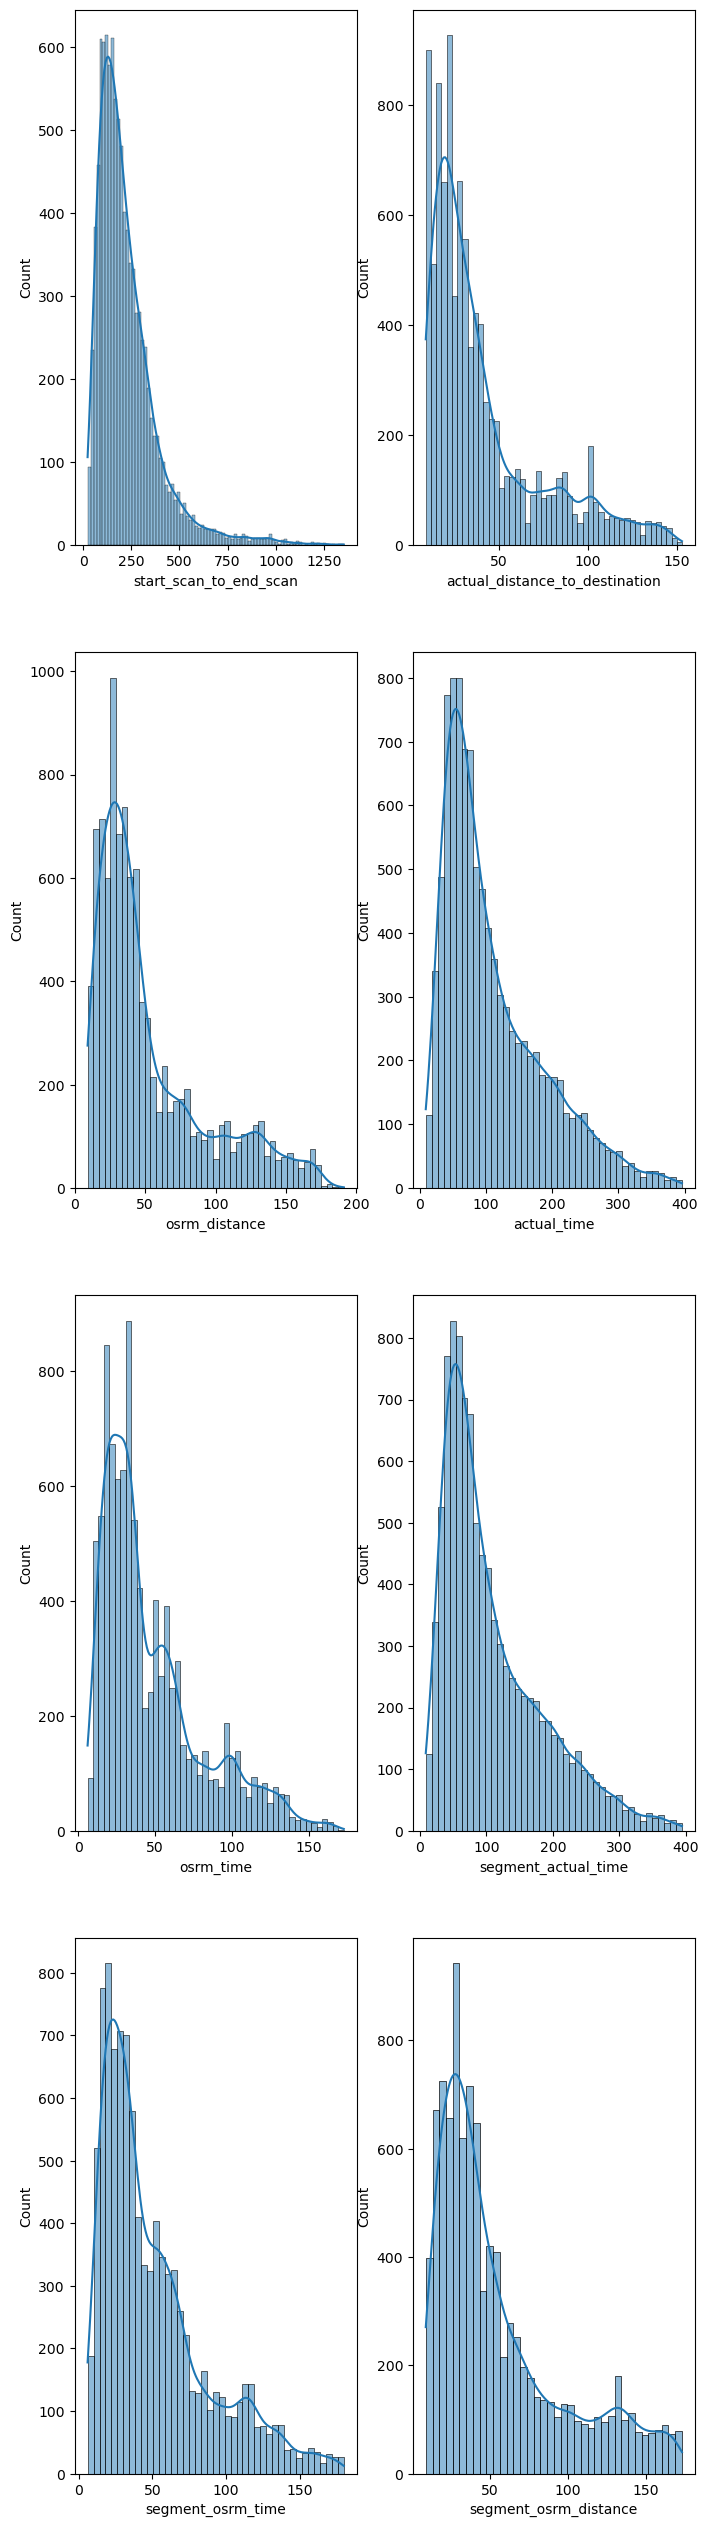

In [361]:
plt.figure(figsize=(8,32))
j=1
for i in columns:
    plt.subplot(4,2,j)
    sns.histplot(data=df4, x=i, kde=True) 
    j+=1

Here in the above histplots we can see that all the variables are distributed in right skewed manner with one major peak, and hence it would be better to go for standardization for all the variables. So we will use df_train_standard and df_test_standard for training and testing the model.

# Insights and Recommendations

1. As we can see higher number pf orders are for Carting compared to FTL.

2. The average time taken by FTL is is almost 7 times compared to Carting. This is because FTL is used when a truck with full      load is to be transported to a relatively longer distance.

3. As we can see for FTL the average distance to destination is very high compared to Carting. This maybe because FTL normally      used when a truck with a full load is to be transported to a relatively longer distance whereas Carting is used where many      stops might be required in between.

4. Insight: As we can see highest orders are from Maharashtra.

   Recommendation: More vehicles maybe kept ready for the state of Maharashtra and Karnataka inorder to cater high demand which    is possibly because of highest number of industries present in these state.

5. Insight: AS we can see highest number of orders are from Bengaluru and then Gurgaon.

   Recommendation: Bengaluru and Gurgaon are highly developed cities with high number of industries and much higher population      compared to other places. So highes number of vehciles must be kep available for these cities from which highest number of      orders are coming.
   
6. Insight: Here also Bengaluru is coming first then Mumbai and then Gurgaon when we compare destination cities with number of      orders.

   Recommendation: As mentioned previously, vehicles are to be kept reserved for these cities.
   
7. Insight: Above barplot shows the states with highest number of insterstate orders(within the state). Highest is in        
   Maharashtra and then comes Karnataka.

   Recommendation: To cater the demand for interstate orders enough amount of state permit vehicles maybe kept available and not    national permit because can avoid the burder of paying the extra amount for national permit.
   
8. Insights: Highest number of instra-state movements are between Delhi_Haryana and Haryana-Delhi.

   Recommendation: Highest number of national permit(NP) vehicles must be reserved for these routes.